In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
vehicle_sales_data = pd.read_csv("/kaggle/input/vehicle-sales-data/car_prices.csv")
vehicle_sales_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
vehicle_sales_data.shape

(558837, 16)

In [4]:
vehicle_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
vehicle_sales_data[vehicle_sales_data.make.isnull()].head(4)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
742,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c51cc964387,ca,38.0,23208.0,gray,black,financial services remarketing (lease),47200.0,46000.0,Thu Feb 26 2015 04:30:00 GMT-0800 (PST)
747,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c53cc964410,ca,33.0,19785.0,beige,gray,financial services remarketing (lease),49500.0,46000.0,Thu Feb 12 2015 04:30:00 GMT-0800 (PST)
766,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c54cc964089,ca,37.0,48424.0,black,black,financial services remarketing (lease),42300.0,43000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
798,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c59cc448049,ca,48.0,39825.0,—,gray,financial services remarketing (lease),58100.0,58500.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [6]:
vehicle_sales_data = vehicle_sales_data.drop\
(vehicle_sales_data[vehicle_sales_data.make.isnull()].index)

In [7]:
vehicle_sales_data.reset_index(drop = True).shape

(548536, 16)

In [8]:
vehicle_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548536 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          548536 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  484945 non-null  object 
 6   vin           548532 non-null  object 
 7   state         548536 non-null  object 
 8   condition     536803 non-null  float64
 9   odometer      548446 non-null  float64
 10  color         547802 non-null  object 
 11  interior      547802 non-null  object 
 12  seller        548536 non-null  object 
 13  mmr           548498 non-null  float64
 14  sellingprice  548524 non-null  float64
 15  saledate      548524 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 71.1+ MB


In [9]:
vehicle_sales_data.loc[(vehicle_sales_data['model'].isnull())&(vehicle_sales_data['make']=='BMW')&(vehicle_sales_data['trim'].str.startswith('7')),'model']='7 series'
vehicle_sales_data.loc[(vehicle_sales_data['model'].isnull())&(vehicle_sales_data['make']=='BMW')&(vehicle_sales_data['trim'].str.startswith('6')),'model']='6 series'

In [10]:
vehicle_sales_data = vehicle_sales_data.drop(vehicle_sales_data.loc[(vehicle_sales_data['model'].isnull())].index)

In [11]:
vehicle_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548524 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          548524 non-null  int64  
 1   make          548524 non-null  object 
 2   model         548524 non-null  object 
 3   trim          548174 non-null  object 
 4   body          545630 non-null  object 
 5   transmission  484937 non-null  object 
 6   vin           548520 non-null  object 
 7   state         548524 non-null  object 
 8   condition     536791 non-null  float64
 9   odometer      548434 non-null  float64
 10  color         547790 non-null  object 
 11  interior      547790 non-null  object 
 12  seller        548524 non-null  object 
 13  mmr           548486 non-null  float64
 14  sellingprice  548512 non-null  float64
 15  saledate      548512 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 71.1+ MB


In [12]:
def fill(series):
    for i in vehicle_sales_data['make'].unique():
        if vehicle_sales_data.loc[(vehicle_sales_data['make']==i)][series].mode().empty:
            mode = vehicle_sales_data[series].mode()[0]
        else:
            mode = vehicle_sales_data.loc[(vehicle_sales_data['make']==i)][series].mode()[0]

        vehicle_sales_data.loc[(vehicle_sales_data['make']==i)&(vehicle_sales_data[series].isnull()),series]=mode

In [13]:
for i in vehicle_sales_data.select_dtypes(include = 'object').columns:
    print(i)

make
model
trim
body
transmission
vin
state
color
interior
seller
saledate


In [14]:
cols = ['body',
'transmission',
'vin',
'state',
'color',
'interior',
'seller']

In [15]:
for i in cols:
    fill(i)

In [16]:
vehicle_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548524 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          548524 non-null  int64  
 1   make          548524 non-null  object 
 2   model         548524 non-null  object 
 3   trim          548174 non-null  object 
 4   body          548524 non-null  object 
 5   transmission  548524 non-null  object 
 6   vin           548524 non-null  object 
 7   state         548524 non-null  object 
 8   condition     536791 non-null  float64
 9   odometer      548434 non-null  float64
 10  color         548524 non-null  object 
 11  interior      548524 non-null  object 
 12  seller        548524 non-null  object 
 13  mmr           548486 non-null  float64
 14  sellingprice  548512 non-null  float64
 15  saledate      548512 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 71.1+ MB


In [17]:
vehicle_sales_data = vehicle_sales_data.drop(vehicle_sales_data[vehicle_sales_data['sellingprice'].isnull()].index)

In [18]:
vehicle_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548512 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          548512 non-null  int64  
 1   make          548512 non-null  object 
 2   model         548512 non-null  object 
 3   trim          548162 non-null  object 
 4   body          548512 non-null  object 
 5   transmission  548512 non-null  object 
 6   vin           548512 non-null  object 
 7   state         548512 non-null  object 
 8   condition     536779 non-null  float64
 9   odometer      548422 non-null  float64
 10  color         548512 non-null  object 
 11  interior      548512 non-null  object 
 12  seller        548512 non-null  object 
 13  mmr           548486 non-null  float64
 14  sellingprice  548512 non-null  float64
 15  saledate      548512 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 71.1+ MB


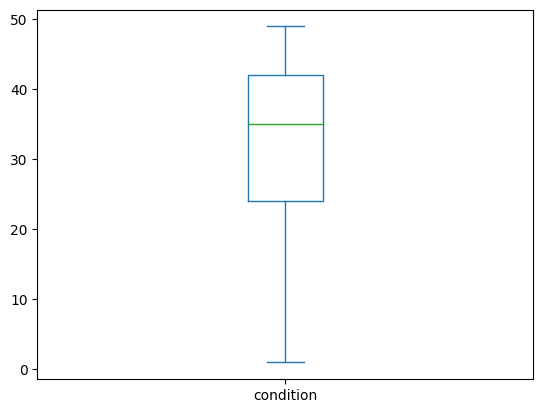

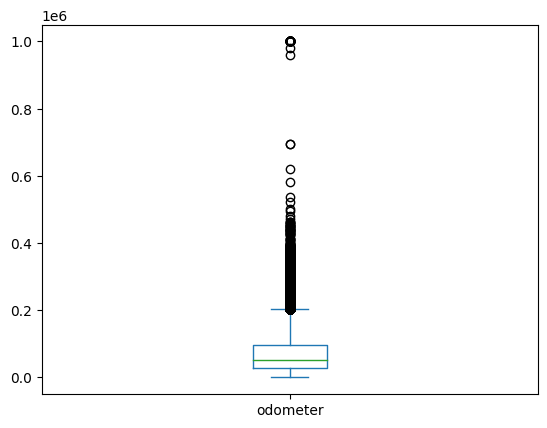

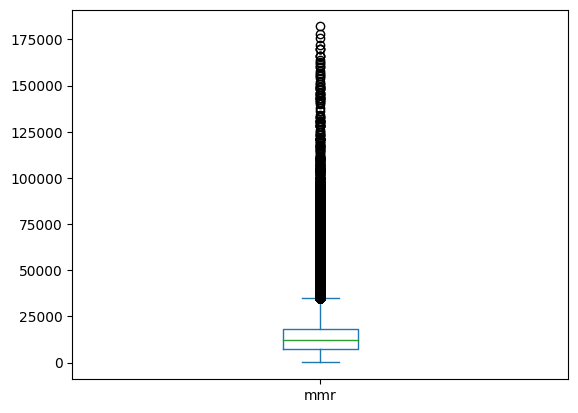

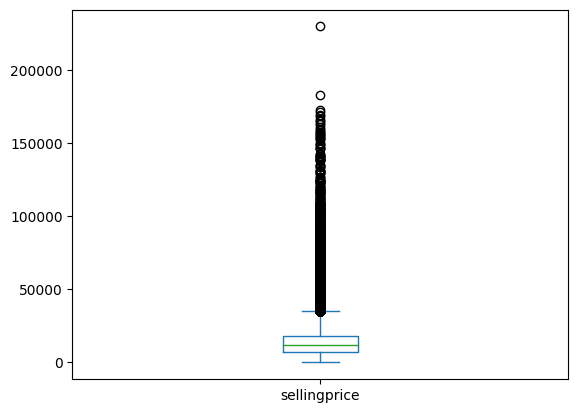

In [19]:
for i in vehicle_sales_data.select_dtypes(include = 'float64').columns:
    vehicle_sales_data[[i]].plot(kind = 'box')

In [20]:
def treat_outlier(df,col):
    lower = np.percentile(df[[col]].dropna(),25)
    upper = np.percentile(df[[col]].dropna(),75)
    IQR = upper-lower
    df[col] = np.where(df[col]>upper+(1.5*IQR),upper,np.where(df[col]<lower-(1.5*IQR),lower,df[col]))

In [21]:
for i in vehicle_sales_data.select_dtypes(include = 'float64').columns:
    treat_outlier(vehicle_sales_data,i)

In [22]:
vehicle_sales_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),18400.0,18300.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


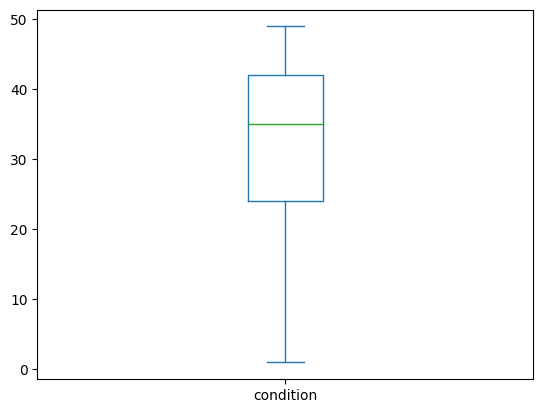

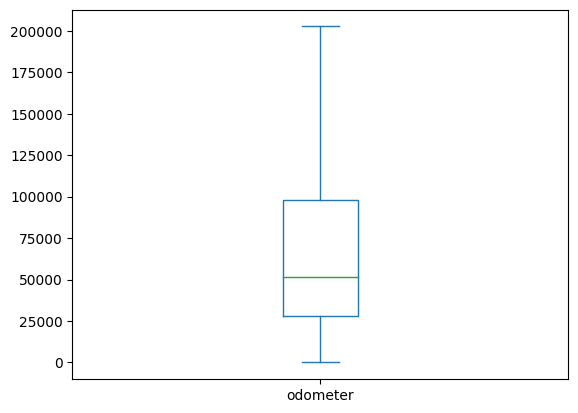

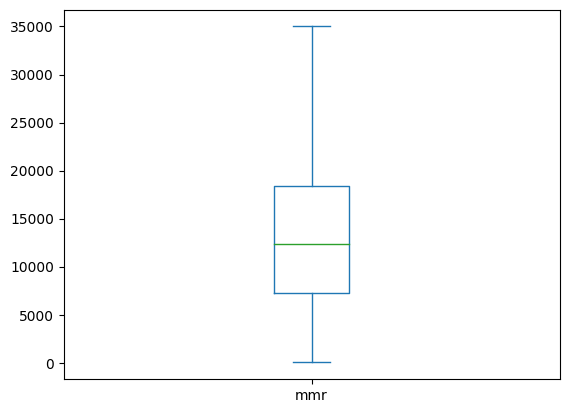

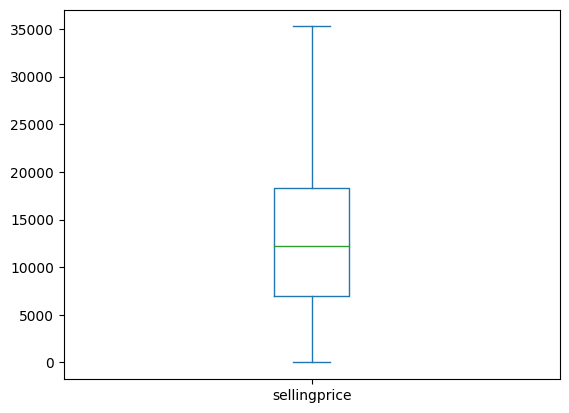

In [23]:
for i in vehicle_sales_data.select_dtypes(include = 'float64').columns:
    vehicle_sales_data[[i]].plot(kind = 'box')

In [24]:
vehicle_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548512 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          548512 non-null  int64  
 1   make          548512 non-null  object 
 2   model         548512 non-null  object 
 3   trim          548162 non-null  object 
 4   body          548512 non-null  object 
 5   transmission  548512 non-null  object 
 6   vin           548512 non-null  object 
 7   state         548512 non-null  object 
 8   condition     536779 non-null  float64
 9   odometer      548422 non-null  float64
 10  color         548512 non-null  object 
 11  interior      548512 non-null  object 
 12  seller        548512 non-null  object 
 13  mmr           548486 non-null  float64
 14  sellingprice  548512 non-null  float64
 15  saledate      548512 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 71.1+ MB


In [25]:
vehicle_sales_data = vehicle_sales_data.drop(vehicle_sales_data[vehicle_sales_data.trim.isnull()].index).drop('vin', axis = 1)

In [26]:
vehicle_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548162 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          548162 non-null  int64  
 1   make          548162 non-null  object 
 2   model         548162 non-null  object 
 3   trim          548162 non-null  object 
 4   body          548162 non-null  object 
 5   transmission  548162 non-null  object 
 6   state         548162 non-null  object 
 7   condition     536501 non-null  float64
 8   odometer      548074 non-null  float64
 9   color         548162 non-null  object 
 10  interior      548162 non-null  object 
 11  seller        548162 non-null  object 
 12  mmr           548136 non-null  float64
 13  sellingprice  548162 non-null  float64
 14  saledate      548162 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 66.9+ MB


In [27]:
for i in vehicle_sales_data.select_dtypes(include = 'float64').columns:
    vehicle_sales_data[i] = vehicle_sales_data[i].fillna(vehicle_sales_data[i].mean())

In [28]:
vehicle_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548162 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          548162 non-null  int64  
 1   make          548162 non-null  object 
 2   model         548162 non-null  object 
 3   trim          548162 non-null  object 
 4   body          548162 non-null  object 
 5   transmission  548162 non-null  object 
 6   state         548162 non-null  object 
 7   condition     548162 non-null  float64
 8   odometer      548162 non-null  float64
 9   color         548162 non-null  object 
 10  interior      548162 non-null  object 
 11  seller        548162 non-null  object 
 12  mmr           548162 non-null  float64
 13  sellingprice  548162 non-null  float64
 14  saledate      548162 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 66.9+ MB


In [29]:
vehicle_sales_data.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),18400.0,18300.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [30]:
vehicle_sales_data['len'] = vehicle_sales_data['saledate'].apply(lambda x:len(x))
print(vehicle_sales_data['len'].unique())
vehicle_sales_data.loc[(vehicle_sales_data['len']==5)|(vehicle_sales_data['len']==4),'saledate'] = 'Thu Dec 18 2014 12:30:00 '

[39  5  4]


In [31]:
vehicle_sales_data['saledate'] = vehicle_sales_data['saledate'].apply(lambda x:datetime.datetime.strptime(x[:x.find('GMT')].strip(),'%a %b %d %Y %H:%M:%S'))

In [32]:
vehicle_sales_data['sale_year'] = vehicle_sales_data['saledate'].dt.year
vehicle_sales_data['sale_month'] = vehicle_sales_data['saledate'].dt.month
vehicle_sales_data['sale_day'] = vehicle_sales_data['saledate'].dt.day
vehicle_sales_data['sale_time'] = vehicle_sales_data['saledate'].dt.time

In [33]:
vehicle_sales_data.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,len,sale_year,sale_month,sale_day,sale_time
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00,39,2014,12,16,12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00,39,2014,12,16,12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00,39,2015,1,15,04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00,39,2015,1,29,04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),18400.0,18300.0,2014-12-18 12:30:00,39,2014,12,18,12:30:00
